##  Importing all the relevant libraries

In [4]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import seaborn as sns
import re
import nltk
from nltk.stem import PorterStemmer
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV


## Loading the dataset

In [5]:
dataset = pd.read_csv('train.csv')
dataset.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


## Splitting the data into train, test and validation sets

### Here, we have implemented a 60 : 20 : 20 split

In [6]:
train_data, test_data = train_test_split(dataset, test_size=0.4, random_state=1)
val_data, test_data = train_test_split(test_data, test_size=0.5, random_state=1)

#resets index after splitting data
train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

print("Train set size is: ",len(train_data))
print("Val set size is: ",len(val_data))
print("Test set size is: ",len(test_data))

Train set size is:  93636
Val set size is:  31212
Test set size is:  31212


## Generating the stopwords

### Here, we have added a few extra stopwords relating to the movie scene using the .extend feature of the nltk

In [7]:
stpwrd = nltk.corpus.stopwords.words('english')

new_stopwords = set(['Laura', 'Pauline', 'BMW', 'Carol', 'Kane', 'Evelyn', 'Cahill',
 'Adam',
 'Garcia',
 'X-Men',
 'Glover',
 'Disney',
 'Antwone',
 'Fisher',
 'Gayton',
 'Lyne',
 'African',
 'American',
 'Godard',
 'Dickens',
 'Woody',
 'Martin',
 'Scorsese',
 'New',
 'York',
 'Decasia',
 'Limit',
  'Hollywood',
 'Michael',
 'Moore',
 'Robin',
 'Williams',
 'Rorschach',
 'Watts',
 'Broomfield',
 'Washington',
 'Argentine',
 'Fabian',
 'Bielinsky',
 'Tunis',
 'Bebe',
 'Neuwirth',
 'John',
 'C.',
 'Walsh',
 'Ms.',
 'Fontaine',
 'Ritchie',
'Copmovieland',
 'Egoyan',
    'France',
 'Carlen',
 'Campanella',
 'Norma',
 'Rae',
 'Bartlett',
 'Chicago',
 'Gere',
 'Peter',
 'Mattei',
 'Famuyiwa',
 'Tara',
 'Reid',
 'Hawaiian',
 'Sendak',
 'David',
 'Cronenberg',
'Anne',
 'Busby',
 'Malkovich',
 'Statham',
 'Freudian',
 'Cattaneo',
 'Tim',
 'Apted',
 'Nicholas',
 'Kazan',
 'Kilmer',
 'One',
 'Jaglom',
 'Twohy',
 'Chinese',
 'Jerry',
 'Bruckheimer',
 'Joel',
 'Schumacher',
 'Chris',
 'Smith',
 'Hawk',
'Katherine',
 'Blake',
 'Wilde',
 'Clint',
 'Eastwood',
 'Miramax',
 'Reno',
 'Louiso',
 'Ivory',
 'Vietnam',
 'Vietnamese',
 'Shakespeare',
 'America',
 'Del',
 'Toro',
'Hip-Hop',
 'Scooby-Doo',
 'Aan',
 'Steve',
 'Irwin',
 'Taylor',
 'Le',
 'Jean-Luc',
 'Pamela',
 'Taymor',
 'George',
 'W.',
 'Bush',
 'Henry',
 'Kissinger',
 'Larry',
 'King',
 'Holly',
 'Marina',
'Steven',
 'Shainberg',
 'Mary',
 'Gaitskill',
 'Reyes',
 'Roberto',
 'Benigni',
 'Kaufman',
 'Jonze',
 'Ralph',
 'Waltz',
 'Roger',
 'Kumble',
 'Damon\\/Bourne',
 'Charlie',
 'Donald',
 'Madonna'])
                 

stpwrd.extend(new_stopwords)

## Preprocessing the Reviews

### This includes the following steps:
### 1. Lower Casting - done to reduce the dimensions
### 2. Removal of punctuations which wont be of use
### 3. Stop words removal - removal of words that donot help in distinguishing documents
### 4. Stemming - transforms a word to its root form

### Following this, we add an extra column " count " which counts the number of words present and removes the entires where this count is <= 1

In [8]:
porter = PorterStemmer() #for stemming

In [9]:
def ret_words(review):
    review = review.lower()
    review = review.replace('-','')
    review = review.replace(',',' ')
    review = review.replace(';', ' ')
    review = review.replace('\'', '')
    review = review.replace('\\', '')
    review = review.replace('/', '')
    review = review.replace('.', '')
    review = review.replace('...', '')
    words = []
    for word in review.split():
        if re.findall('[0-9]', word): continue
        if word in stpwrd: continue
        if re.findall('[^a-zA-Z]',re.sub(r'[^\w\s]','',word)): continue
        if len(word) > 0: words.append(porter.stem(re.sub(r'[^\w\s]','',word)))
    return ' '.join(words)


In [10]:
def preprocess(df,flag):
    df['count']=df['Phrase'].str.split().str.len()
    if flag == 0 :
        df = df.drop(df[df['count']<=1].index)
    df['Phrase'] = df['Phrase'].apply(ret_words)
    return df

In [11]:
train_preprocessed = preprocess(train_data,0)
test_preprocessed = preprocess(test_data,1)
val_preprocessed = preprocess(val_data,1)

In [12]:
train_preprocessed.head()

,PhraseId,SentenceId,Phrase,Sentiment,count
1,15525,665,tri go,2,3
2,119919,6413,week live,2,4
3,17938,781,essenti collect bit,2,5
4,98852,5185,director fake backdrop state pace,1,11
5,33703,1582,regret,2,2


In [13]:
id_train, X_train, y_train = train_preprocessed['PhraseId'], train_preprocessed['Phrase'], train_preprocessed['Sentiment']
id_test, X_test, y_test = test_preprocessed['PhraseId'], test_preprocessed['Phrase'], test_preprocessed['Sentiment']
id_val, X_val, y_val = val_preprocessed['PhraseId'], val_preprocessed['Phrase'], val_preprocessed['Sentiment']

## Training the dataset in different models
### In this part, we:
### 1. Train the dataset using three different models 
### 2. Calculate their accuracy and precision score
### 3. Plot the training and cross validation score

### Model 1
### In this pipeline, we have:
### a. Logistic Regression as the classifier
### b. CountVectorizer for tokenizing the text along with performing the basic preprocessing techniques.

In [14]:
LR_model = Pipeline([
    ('vect', CountVectorizer()),
    ('clff', LogisticRegression(random_state=0, max_iter=3000))])
LR_model.fit(X_train, y_train)
LR_model_predict = LR_model.predict(X_train)

print(accuracy_score(y_train, LR_model_predict))
print(precision_score(y_train, LR_model_predict, average='weighted'))

0.6988174868609651
0.6977537813649876


In [15]:
train_sizes, train_scores, test_scores = learning_curve(LR_model, X_train, y_train,cv=3,scoring='precision_weighted',n_jobs=-1, 
                                                       
                                                        train_sizes=np.linspace(0.01, 1.0, 10))

### Plotting

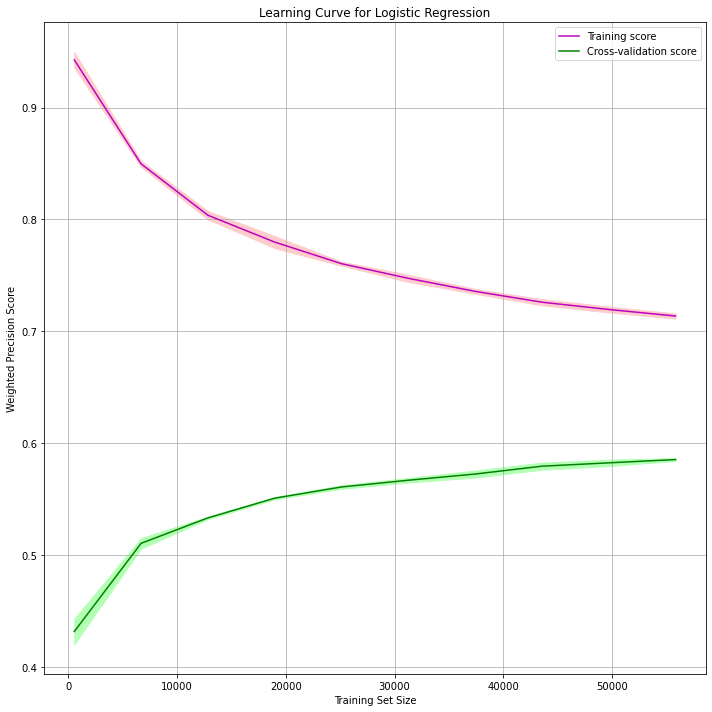

In [16]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
fig, ax = plt.subplots(figsize=(10,10))

# Drawing lines and bands
plt.plot(train_sizes, train_mean, color='m',  label="Training score")
plt.plot(train_sizes, test_mean, color='g', label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#ffcccc')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#b3ffb3")

# Creating the plot
plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Training Set Size")
plt.ylabel("Weighted Precision Score")
plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

### Model 2
### In this pipeline, we have:
### a. Linear SVC as the classifier
### b. CountVectorizer for tokenizing the text along with performing the basic preprocessing techniques.

#### The objective of a Linear SVC (Support Vector Classifier) is to fit to the data we provide, returning a "best fit" hyperplane that divides, or categorizes, your data.

In [17]:
SVM_model = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', LinearSVC(max_iter=3000))
])
SVM_model.fit(X_train, y_train)
SVM_model_predict = SVM_model.predict(X_test)

print(accuracy_score(y_test, SVM_model_predict))
print(precision_score(y_test, SVM_model_predict, average='weighted'))

0.6127450980392157
0.5925993442534702


In [18]:
train_sizes, train_scores, test_scores = learning_curve(SVM_model,X_train,y_train,cv=3,scoring='precision_weighted',n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 10))

### Plotting

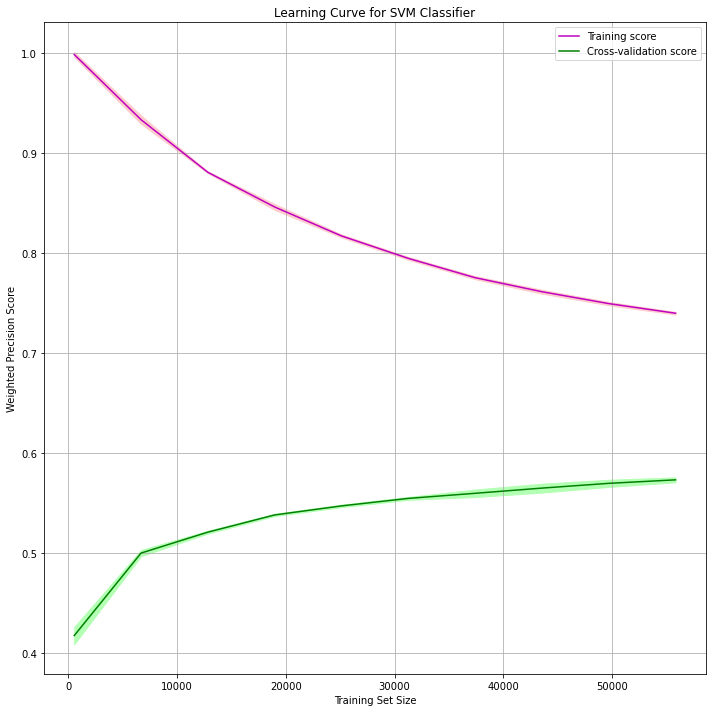

In [19]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
fig, ax = plt.subplots(figsize=(10,10))

# Draw lines and bands
plt.plot(train_sizes, train_mean, color='m',  label="Training score")
plt.plot(train_sizes, test_mean, color='g', label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#ffcccc')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#b3ffb3")

# Create plot
plt.title("Learning Curve for SVM Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Weighted Precision Score")
plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

### Model 3
### In this pipeline, we have:
### a. Multinomial Naive Bayes as the classifier
### b. CountVectorizer for tokenizing the text along with performing the basic preprocessing techniques.

#### Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP). The algorithm is based on the Bayes theorem and predicts the tag of a text. It calculates the probability of each tag for a given sample and then gives the tag with the highest probability as output.

In [20]:
NaiveBayes_model = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB())
])
NaiveBayes_model.fit(X_train, y_train)
NaiveBayes_model_predict = NaiveBayes_model.predict(X_train)

print(accuracy_score(y_train, NaiveBayes_model_predict))
print(precision_score(y_train, NaiveBayes_model_predict, average='weighted'))

0.6536430960344004
0.6455205194461358


In [21]:
train_sizes, train_scores, test_scores = learning_curve(NaiveBayes_model,X_train,y_train,cv=3,scoring='precision_weighted',n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 10))

### Plotting

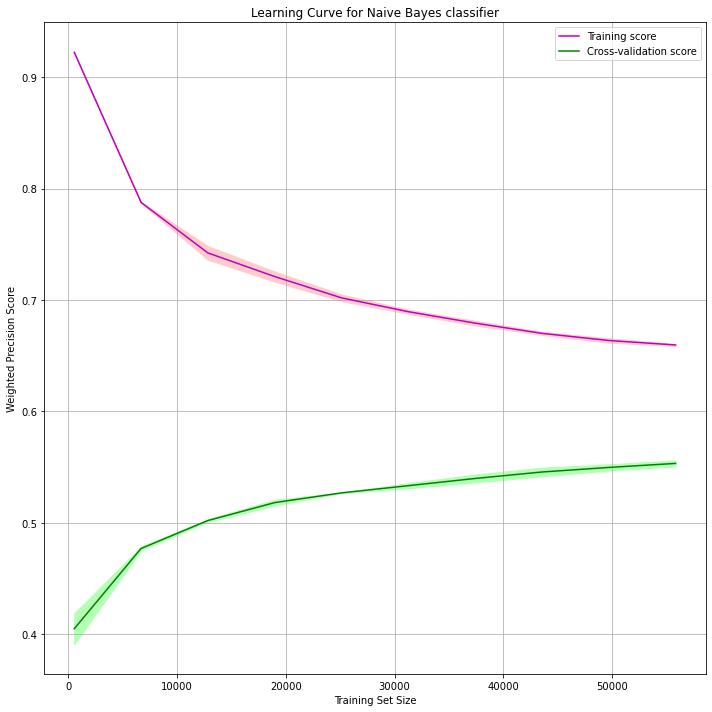

In [22]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
fig, ax = plt.subplots(figsize=(10,10))

# Draw lines and bands
plt.plot(train_sizes, train_mean, color='m',  label="Training score")
plt.plot(train_sizes, test_mean, color='g', label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#ffcccc')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#b3ffb3")
 
# Create plot
plt.title("Learning Curve for Naive Bayes classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Weighted Precision Score"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

### Model 4
### In this pipeline, we have:
### a. Decision Tree as the classifier
### b. CountVectorizer for tokenizing the text along with performing the basic preprocessing techniques.

#### In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.

In [23]:
DT_model = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', tree.DecisionTreeClassifier())
])
DT_model.fit(X_train, y_train)
DT_predict = DT_model.predict(X_train)

print(accuracy_score(y_train, DT_predict))
print(precision_score(y_train, DT_predict, average='weighted'))

0.8843764930721453
0.8876575373535505


In [24]:
train_sizes, train_scores, test_scores = learning_curve(DT_model, X_train, y_train,cv=3,scoring='precision_weighted',n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 10))

### Plotting

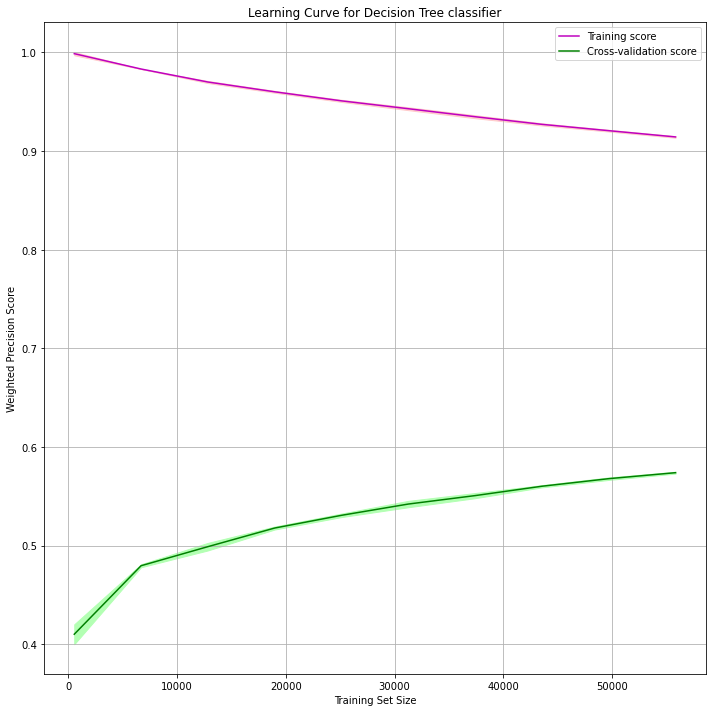

In [25]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
fig, ax = plt.subplots(figsize=(10,10))

plt.plot(train_sizes, train_mean, color='m',  label="Training score")
plt.plot(train_sizes, test_mean, color='g', label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#ffcccc')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#b3ffb3")

plt.title("Learning Curve for Decision Tree classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Weighted Precision Score"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

## From the above scores of different models, we can conclude that the Decision Tree model yields the best results.

## We now conduct the hyperparameter tuning process on this model

## Searching for the best hyperparameter using GridsearchCV

In [26]:
vect=  CountVectorizer()
X_train_cnt = vect.fit_transform(X_train)

In [36]:
def DT_param_selection(X, y, nfolds):
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(400 , 500)}
    dtree_model=DecisionTreeClassifier()
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds, verbose = 1, n_jobs = -1)
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

In [37]:
DT_param_selection( X_train_cnt,y_train,2)

Fitting 2 folds for each of 200 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 25.5min finished


{'criterion': 'gini', 'max_depth': 496}

### Plugging in this value of max_depth and getting the scores on the validation set

In [50]:
DT_model = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', tree.DecisionTreeClassifier(max_depth = 496))
])
DT_model.fit(X_train, y_train)
DT_predict = DT_model.predict(X_val)

print("Accuracy Score on Validation set",accuracy_score(y_val, DT_predict))
print("Precsion Score on the Validation set",precision_score(y_val, DT_predict, average='weighted'))

Accuracy Score on Validation set 0.6229014481609637
Precsion Score on the Validation set 0.604886749709194


## Confusion Matrix

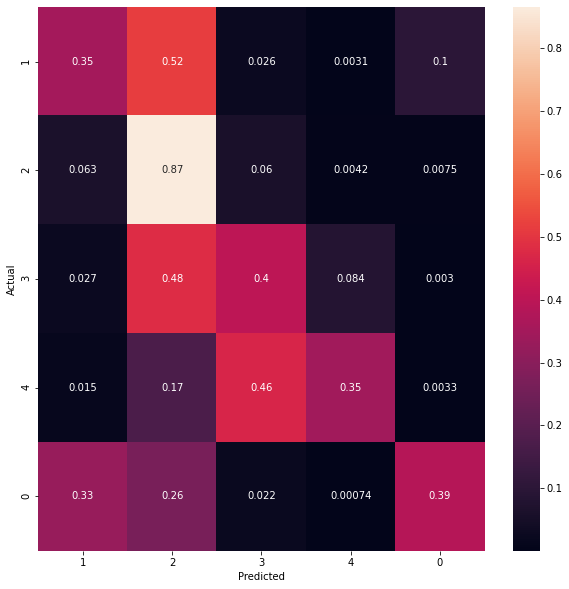

In [48]:
conf_mat = pd.DataFrame(confusion_matrix(y_val, DT_predict, labels=labels))
conf_mat_n = conf_mat.divide(conf_mat.sum(axis=1), axis=0)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat_n, annot=True,xticklabels=labels,yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()